In [232]:
#installation of pacakages 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np


# Opening xlsx faile 

# I am using pathlib to keep my folders clean. I decied to segragate files by type. 

In [259]:
project_root = Path.cwd().parent
data= project_root / "data" 
Path(data).mkdir(parents=True, exist_ok=True)
project_root
input_file_name=data/"autoscout24-germany-dataset-task.xlsx"

In [260]:
df=pd.read_excel(input_file_name)
df

,mileage;make;model;fuel;gear;offerType;price;hp;year
0,NaN
1,235000;BMW;316;Diesel;Manual;Used;6800;116;2011
2,NaN
3,92800;Volkswagen;Golf;Gasoline;Manual;Used;687...
4,NaN
...,...
92805,99;Fiat;500;Electric/Gasoline;Manual;Pre-regis...
92806,NaN
92807,99;Fiat;500;Electric/Gasoline;Manual;Pre-regis...
92808,NaN


# Empty records need to be deleted. All values are in one column and they are separated by ';'. The data can be read correctly by exporting to a CSV.

In [297]:
df_cleaned = df.dropna(how='all')
df_cleaned
output_csv = data/ "dane_auto.csv"
df_cleaned.to_csv(output_csv, index=False)


Reading data with no empty rows.

In [296]:
df=pd.read_csv(data/"dane_auto.csv",sep=';')
df.head(10)


,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.0,2011
6,91894,Renault,Scenic,Diesel,Manual,Used,6970,131.0,2011
7,127500,Opel,Zafira,Gasoline,Manual,Used,6972,116.0,2011
8,115000,Mazda,3,Gasoline,Automatic,Used,6980,150.0,2011
9,104,Ford,Transit,Diesel,Manual,Used,6990,86.0,2011


Export to xlsx to mark down by color outliers and strange, uncorrect values.

In [263]:
output_xlsx = data/ "dane_auto.xlsx"
df.to_excel(output_xlsx)

# Second part of data cleaing, searching throug the columns to find and check unusual values. I want share with you my Python and Excel skills so this part will be permored in both of this programs.

In [264]:

min_mileage=min(df["mileage"])
print(min_mileage)
# 0 is unsual milage valuen for used cars.

zero_mileage_used=df[(df["mileage"]==0) & (df["offerType"]=="Used")]
print(min_mileage)
print(zero_mileage_used.count())

# Records included into zero_mileage_used shoudl be delated, or 0 in "mileage" shoudl be replaced with corect values. OfferType column also can be repaired by changing "used" to another category. 
# For changing any of mentiond values specfic knowlage is requaired. 

0
0
mileage      10
make         10
model         9
fuel         10
gear         10
offerType    10
price        10
hp           10
year         10
dtype: int64


In [265]:
lack_in_make=df["make"].isnull().any()
print(lack_in_make)

#there is no lacking values in this column

unique_make=df["make"].unique()
print(unique_make)

#Everything seems to be alright expect value Others 

others_make=df[df["make"]=="Others"]
print(others_make.count)
 
# Is worth to consider if this is important to include in our analysis cars that have not assigned specfic maker?

False
['BMW' 'Volkswagen' 'SEAT' 'Renault' 'Peugeot' 'Toyota' 'Opel' 'Mazda'
 'Ford' 'Mercedes-Benz' 'Chevrolet' 'Audi' 'Fiat' 'Kia' 'Dacia' 'MINI'
 'Hyundai' 'Skoda' 'Citroen' 'Infiniti' 'Suzuki' 'SsangYong' 'smart'
 'Cupra' 'Volvo' 'Jaguar' 'Porsche' 'Nissan' 'Honda' 'Lada' 'Mitsubishi'
 'Others' 'Lexus' 'Jeep' 'Maserati' 'Bentley' 'Land' 'Alfa' 'Subaru'
 'Dodge' 'Microcar' 'Lamborghini' 'Baic' 'Tesla' 'Chrysler' '9ff'
 'McLaren' 'Aston' 'Rolls-Royce' 'Alpine' 'Lancia' 'Abarth' 'DS'
 'Daihatsu' 'Ligier' 'Ferrari' 'Caravans-Wohnm' 'Aixam' 'Piaggio' 'Zhidou'
 'Morgan' 'Maybach' 'Tazzari' 'Trucks-Lkw' 'RAM' 'Iveco' 'DAF' 'Alpina'
 'Polestar' 'Brilliance' 'FISKER' 'Cadillac' 'Trailer-AnhÃ¤nger' 'Isuzu'
 'Corvette' 'DFSK' 'Estrima']
<bound method DataFrame.count of        mileage    make     model      fuel       gear       offerType  price  \
365       3500  Others       NaN  Electric     Manual            Used   5500   
2001      2900  Others       NaN  Electric  Automatic            Us

In [266]:
unique_fuel=df["fuel"].unique()
print(unique_fuel)

# In my opinion it is important to check what means -/-(fuel). This might be kind of strange value, which should checked be in the documentation.


['Diesel' 'Gasoline' 'Electric/Gasoline' '-/- (Fuel)' 'Electric'
 'Electric/Diesel' 'CNG' 'LPG' 'Others' 'Hydrogen' 'Ethanol']


In [267]:
unique_gear=df["gear"].unique()
print(unique_gear)

nan_gear=df[df["gear"].isnull()]
print(nan_gear)
print(nan_gear.count())
# There is 182 of empty records in column.Resulotion here might be deleting records with missing value or looking for this values in another dataset 

['Manual' 'Automatic' nan 'Semi-automatic']
       mileage        make         model               fuel gear  \
243      93850     Renault  Grand Scenic             Diesel  NaN   
347      52753        Lada         Vesta           Gasoline  NaN   
612      46850      Suzuki          Alto           Gasoline  NaN   
873     153500  Mitsubishi           ASX             Diesel  NaN   
1333     38000     Renault           ZOE           Electric  NaN   
...        ...         ...           ...                ...  ...   
44540     5000       Volvo           NaN             Others  NaN   
44908     1490     Renault        Megane  Electric/Gasoline  NaN   
45605      250        Fiat     New Panda           Gasoline  NaN   
46326       45         BMW           iX3           Electric  NaN   
46335        7        Ford          Puma           Gasoline  NaN   

            offerType  price     hp  year  
243              Used   7990  110.0  2012  
347              Used   8000  106.0  2017  
612    

In [268]:
unique_offerType=df["offerType"].unique()
print(unique_offerType)

# This column looks fine, no empty records.

['Used' 'Demonstration' "Employee's car" 'Pre-registered' 'New']


In [269]:

avg_price=df['price'].mean()
negative_prices=df[df['price']<0]
print(negative_prices)

# Price can't be below 0. Records with prices with below 0 shoudl be delated or we can look for correct price in another dataset.


       mileage        make   model      fuel       gear offerType  price  \
29258   182000     Hyundai     i10  Gasoline     Manual      Used  -3450   
29340    25526        SEAT   Ateca    Diesel  Automatic      Used -21440   
29341    97311  Volkswagen  Tiguan    Diesel     Manual      Used -21480   

          hp  year  
29258   69.0  2015  
29340  116.0  2019  
29341  150.0  2019  


In [270]:
min_hp=df["hp"].min()
print(min_hp)

# 1 horse power seems strage to me. I was tryning to find information about minimum number of horse power in a car. Per chat gpt after 2011 car with lowest number of hp is Renoult Twizz with only 5,4hp.

one_hp=df[df["hp"]==1]
one_hp
#print(one_hp.count())

# Strange low number of hp mostly corresponds with nan values in gear column, if they are not corresponding with NaN in gear, they are related to "others" in another column.In my opinion this records should be deleted.

1.0


,mileage,make,model,fuel,gear,offerType,price,hp,year
9110,167000,Renault,Megane,Diesel,Manual,Used,5450,1.0,2012
13030,800,Others,NaN,Others,NaN,Used,2450,1.0,2019
25878,2000,Others,NaN,Others,NaN,Used,10999,1.0,2015
26088,2000,Others,NaN,Others,NaN,Used,10999,1.0,2015
28064,100,Volkswagen,NaN,Others,NaN,Demonstration,2600,1.0,2019
28065,100,Trailer-AnhÃ¤nger,NaN,Others,NaN,Used,2800,1.0,2019
36204,302000,Toyota,Prius+,Electric/Gasoline,NaN,Used,7985,1.0,2013
44072,1,Trailer-AnhÃ¤nger,NaN,Others,NaN,Used,2500,1.0,2019
44540,5000,Volvo,NaN,Others,NaN,Used,2499,1.0,2020


In [271]:
min_year=df["year"].min()
max_year=df["year"].max()
unique_year=df["year"].unique()
print(min_year)
print(max_year)
print(unique_year)

# Currently we have year 2024, 2032 is incorrect value, it shoud be delated.Also we can check deatils of vehicles assigned to inccorect year in another dataset and replace incorect values.

year_2032=df[df["year"]==2032]
print(year_2032)
print(year_2032.count())



2011
2032
[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2032 2021]
     mileage     make   model               fuel       gear       offerType  \
194      100     Fiat   Panda           Gasoline     Manual  Pre-registered   
195       15     Fiat   Panda  Electric/Gasoline     Manual  Pre-registered   
196       20   Toyota    Aygo           Gasoline     Manual  Pre-registered   
197       15     Fiat   Panda  Electric/Gasoline     Manual  Pre-registered   
198       15     Fiat   Panda  Electric/Gasoline     Manual  Pre-registered   
199       10   Toyota    Aygo           Gasoline     Manual  Pre-registered   
587       10  Hyundai     i30           Gasoline  Automatic  Pre-registered   
588        5  Hyundai  Tucson  Electric/Gasoline  Automatic  Pre-registered   

     price     hp  year  
194  10600   69.0  2032  
195  10680   69.0  2032  
196  10823   72.0  2032  
197  10980   69.0  2032  
198  10980   69.0  2032  
199  10997   72.0  2032  
587  37550  280.0  2032  
588  379

# After checking the errors in the columns, we need to decide how to fix the problems found. I suggested solving specific problems in comments in code blocks when I parsed the column by column dataset.
# The decision on which action is best depends on the specific business question
# In this particular case, based on the fact that this dataset contains 46405 records, I will simply delete outliers. My main motivation is their low number and the fact that this action will not have a major impact on the final results of the analysis.


Data which will be delated:
- 0 milage, used cars
- NaN in Gear
- Prices below 0
- 1hp
- year 2032

In [272]:
# Removing

df_cleaned_1=df.drop(zero_mileage_used.index)
df_cleaned_1.dropna(subset=["gear"],inplace=True)
df_cleaned_1.drop(negative_prices.index,inplace=True)
df_cleaned_1.drop(df_cleaned_1[df_cleaned_1["hp"]==1].index,inplace=True)
df_cleaned_1.drop(year_2032.index,inplace=True)

#check

print(df_cleaned_1[df_cleaned_1["offerType"]=="Used"])
print(df_cleaned_1["gear"].unique())
print(df_cleaned_1["price"].min())
print(df_cleaned_1["hp"].min())
print(df_cleaned_1["year"].max())

df=df_cleaned_1



       mileage        make   model      fuel    gear offerType  price     hp  \
0       235000         BMW     316    Diesel  Manual      Used   6800  116.0   
1        92800  Volkswagen    Golf  Gasoline  Manual      Used   6877  122.0   
2       149300        SEAT    Exeo  Gasoline  Manual      Used   6900  160.0   
3        96200     Renault  Megane  Gasoline  Manual      Used   6950  110.0   
4       156000     Peugeot     308  Gasoline  Manual      Used   6950  156.0   
...        ...         ...     ...       ...     ...       ...    ...    ...   
46386       20     Peugeot     108  Gasoline  Manual      Used  10140   72.0   
46387       20     Peugeot     108  Gasoline  Manual      Used  10140   72.0   
46388       20     Peugeot     108  Gasoline  Manual      Used  10140   72.0   
46389       20     Peugeot     108  Gasoline  Manual      Used  10140   72.0   
46390       20     Peugeot     108  Gasoline  Manual      Used  10540   72.0   

       year  
0      2011  
1      2011

# When we have prepared dataset we can answer busssiens questions

# Nessesary data manipualtion 

In [273]:
# adding new columns to data set

df["age"]=2024-df["year"]
df['if_german'] = np.where(df['make'].isin(["BMW","Mercedes","Volkswagen","Audi","Porshe"]), 1, 0)
df[df["if_german"]==1].count()




mileage      11996
make         11996
model        11979
fuel         11996
gear         11996
offerType    11996
price        11996
hp           11996
year         11996
age          11996
if_german    11996
dtype: int64

In [ ]:
#export of final data

output_csv_2 = data/ "dane_final.csv"
df.to_csv(output_csv_2)

# Calcualtion for qestion 1

In [274]:
df["year"].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [276]:
year = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,2021] 
mean_of_age = [] 
for i in year:     
    df_new = df[df['year'] <= i]     #append do listy     
    mean_of_age.append(df_new['age'].mean()) 
mean_of_age



[13.0,
 12.494035425954934,
 11.98844068877551,
 11.493145764741096,
 10.993013351198737,
 10.487867939538583,
 9.987767479896416,
 9.487380434458714,
 8.987396404268276,
 8.480684142918312,
 7.986840111685894]

In [295]:
type(year)
type(mean_of_age)

df_age=pd.DataFrame({"year":year,
                 "mean":mean_of_age})
df_age
output_xlsx_2 = data/ "q1.xlsx"
df_age.to_excel(output_xlsx_2)


Text(0, 0.5, 'Mean age of the cars')

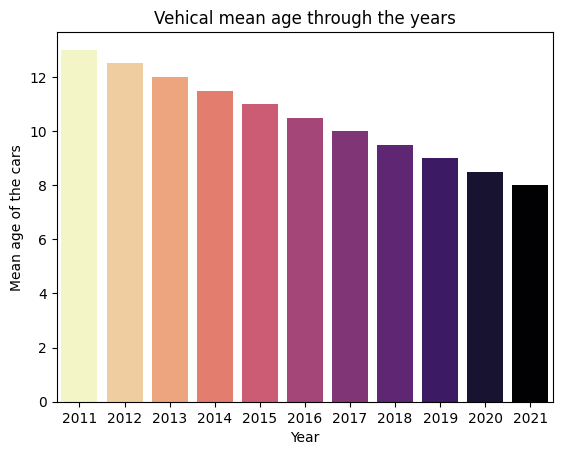

In [293]:
# Creating a chart
# Main visualisation will be prepared in Power Bi and Excel, below code is just a test one

sns.barplot(x='year',y='mean',hue='mean',legend=False,data=df_age,palette="magma")
plt.title('Vehical mean age through the years')
plt.xlabel('Year')
plt.ylabel('Mean age of the cars')
